# Run Trained JoeNet Models for test accuracy 

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
%cd /content/gdrive/MyDrive/ECE570/Project/efficientnet
!ls

/content/gdrive/MyDrive/ECE570/Project/efficientnet
find_hyperparams.py  ray_results.txt	   run_results_40_samples.ipynb
joe_trained_models   README.md		   trained_models
main.py		     runexercises.ipynb    trainingjoe.ipynb
Nets		     run_experiment.py
print_parameters.py  RunExperiments.ipynb


In [4]:
!git pull

remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 9 (delta 4), reused 9 (delta 4), pack-reused 0
Unpacking objects: 100% (9/9), done.
From https://github.com/joempappas/efficientnet
   90bc11c..e976d1f  master     -> origin/master
Updating 90bc11c..e976d1f
Fast-forward
 .../JoeNet_depth_scale_11_15_final_epoch_13.pt       | Bin 0 -> 13161621 bytes
 .../JoeNet_res_scale_11_15_final_epoch_13.pt         | Bin 0 -> 6896470 bytes
 .../JoeNet_width_scale_11_15_final_epoch_13.pt       | Bin 0 -> 8122390 bytes
 3 files changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 joe_trained_models/JoeNet_depth_scale_11_15_final_epoch_13.pt
 create mode 100644 joe_trained_models/JoeNet_res_scale_11_15_final_epoch_13.pt
 create mode 100644 joe_trained_models/JoeNet_width_scale_11_15_final_epoch_13.pt


In [9]:
!ls

find_hyperparams.py  ray_results.txt	   run_results_40_samples.ipynb
joe_trained_models   README.md		   trained_models
main.py		     runexercises.ipynb    trainingjoe.ipynb
Nets		     run_experiment.py
print_parameters.py  RunExperiments.ipynb


In [5]:
import sys
sys.path.append('Nets/')

In [6]:
import Nets.JoeNet as jn
import math
import torch
from torch import nn
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn.functional as F
import torchvision
#from torchinfo import summary

In [11]:
device = torch.device('cuda')
print(device)

cuda


In [8]:
from torchvision.transforms.functional import InterpolationMode
transform = torchvision.transforms.Compose([
    torchvision.transforms.AutoAugment(policy=transforms.AutoAugmentPolicy.CIFAR10, 
                                       interpolation=InterpolationMode.BILINEAR),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Resize(227)])

test_dataset = torchvision.datasets.CIFAR10('/data', train=False, download=True, transform=transform)
# ----------- <End Your code> ---------------

# Define train_loader and test_loader
# ----------- <Your code> ---------------
batch_size = 100

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting /data/cifar-10-python.tar.gz to /data


In [9]:
def test_cifar(classifier, epoch):

  classifier.eval() 

  test_loss = 0
  correct = 0

  with torch.no_grad():
    for images, targets in test_loader:
      images = images.to(device)
      targets = targets.to(device)
      output = classifier(images)
      test_loss += F.cross_entropy(output, targets, reduction='sum').item()
      pred = output.data.max(1, keepdim=True)[1] 
      correct += pred.eq(targets.data.view_as(pred)).sum() 
  
  test_loss /= len(test_loader.dataset)

  print(f'Test result on epoch {epoch}: Avg loss is {test_loss}, Accuracy: {100.*correct/len(test_loader.dataset)}%')

  return correct, len(test_loader.dataset)

In [12]:
max_test_epoch = 5
num_correct, num_samples = 0,0
joenet = jn.JoeNet(scale_width=1.0, scale_depth=1.0, output_size=10)
path = 'joe_trained_models/JoeNet_res_scale_11_15_final_epoch_13.pt'
joenet.load_state_dict(torch.load(path))

joenet.to(device)

for epoch in range(1, max_test_epoch+1):
  correct, samples = test_cifar(joenet, epoch)
  num_correct+=correct
  num_samples+=samples

  print(f'Running accuracy on epoch {epoch}: {100.*num_correct/num_samples}%')



RuntimeError: ignored

In [21]:
import matplotlib.pyplot as plt
import numpy as np

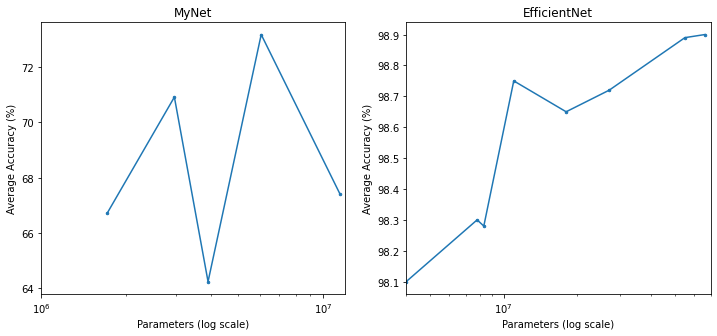

In [69]:
parameters = [1716298, 2972362, 3912730, 6038914, 11477018]
accuracy = [66.7, 70.92, 64.22, 73.19, 67.41]
eff0_a = [98.1, 98.3, 98.28, 98.75, 98.65, 98.72, 98.89, 98.9]
eff0_p = [4000000, 7794184, 8300000,11000000, 18000000,27000000, 55000000, 66347960]


fig,ax = plt.subplots(1,2)
fig.set_size_inches(12,5)

ax[1].set_xlabel("Parameters (log scale)")
ax[1].set_ylabel("Average Accuracy (%)")
ax[1].set_xlim([4000000, 70000000])
ax[1].set_xscale('log')
ax[1].set_title('EfficientNet')
ax[1].plot(eff0_p, eff0_a, marker=".", markersize=5, label='EfficientNet')
ax[0].set_xlabel("Parameters (log scale)")
ax[0].set_ylabel("Average Accuracy (%)")
ax[0].set_xlim([1000000, 12000000])
ax[0].set_xscale('log')
ax[0].set_title('MyNet')
ax[0].plot(parameters, accuracy, marker=".", markersize=5, label='MyNet')
fig.show()

